### Ejercicio 1. Implementación del Método Implícito de Euler

In [1]:
using PyPlot

In [133]:
function f(t,x) #Se crea una función que se utilizará en el método de Runge-Kutta.
    return -x
end

f (generic function with 1 method)

In [134]:
function metodo_implicito_euler(f,x0,t0,tf,h) #Se crea una función que permite, mediante el método
    # implícito de Euler, obtener la solución aproximada de una ecuación diferencial. Dicha función 
    #toma como entradas la función que aparece en tal ecuación, la condición inicial, el valor inicial 
    #de t, el valor final de t, y el valor de h.
    listt = [] #Se crea un vector cuyo valor inicial es t0 y valor final tf donde la separación entre  
    #sus valores está dada por el valor de h.
    listx = [] #Se crea un vector en donde se guardan los valores xk del método implícito de Euler.
    xk = x0
    
    for i in t0:h:tf
        push!(listt,i) 
    end

    for j in 1:length(listt) #Se realiza un for donde le da un intervalo a j cuyo tamaño es el de 
     #la lista de t.
        push!(listx,xk) #Se guardan los valores xk en listx.
        g = - f(listt[j], xk)*h #Se define una función g que se usará en el método implícito.
        dg = 1 - f(listt[j], xk + h) + f(listt[j],xk) #Se escribe la derivada de la función g.
        xk = xk - g/dg #Se realiza la operación que determina los valores xk
    end
    
    return listt, listx #Se regresan la listas listt y listx.
end

metodo_implicito_euler (generic function with 1 method)

In [135]:
metodo_implicito_euler(f,1,0,10,0.1)

(Any[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9  …  9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0], Any[1, 0.909091, 0.826446, 0.751315, 0.683013, 0.620921, 0.564474, 0.513158, 0.466507, 0.424098  …  0.000171106, 0.000155551, 0.00014141, 0.000128555, 0.000116868, 0.000106243, 9.6585e-5, 8.78045e-5, 7.98223e-5, 7.25657e-5])

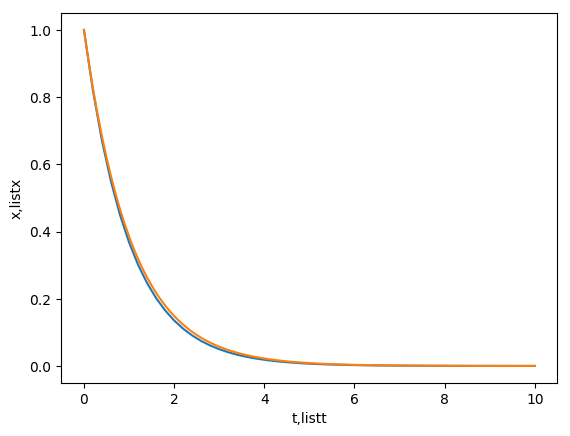

PyObject <matplotlib.text.Text object at 0x000000003D922518>

In [136]:
#Se grafica la solución usando el método implícito y también se grafica la solución exacta.
t = []
x = []
for i in 0:50
    push!(t,10*i/50)
    push!(x,exp.(-t[i+1]))
end
plot(t,x)
listt,listx = metodo_implicito_euler(f,1,0,10,0.1)
plot(listt,listx)
ylabel("x,listx")
xlabel("t,listt")

### Ejercicio 2. Implementación del Método de Euler "Regla del Punto Medio"

In [137]:
function regla_punto_medio(f,x0,t0,tf,h) #Se crea una función que permite, mediante el método del punto
    #medio, obtener la solución aproximada de una ecuación diferencial. Las entradas de esta función son 
    #las mismas que aquellas de la función para el método implícito de Euler.
    listt_medio = [] #Se crea un vector cuyo valor inicial es t0 y valor final tf donde la separación entre  
    #sus valores está dada por el valor de h.
        for i in t0:h/2:tf
            push!(listt_medio,i)
        end
    listx = [] #Se crea un vector en donde se guardan los valores xk del método de la regla del punto medio.
    xk = x0
        for j in 1:length(listt_medio) #Se realiza un for donde se le asigna un intervalo a j cuyo 
        #tamaño es la mitad del tamaño de la lista t.
        if iseven(j) 
            push!(listx,xk) #Se guarda el valor de j en la lista x.
            xk = xk + f(listt_medio[j+1],xk+ f(xk,listt_medio[j]*h/2))*h #Se crea una función que se requiere en este método.
        end
        
        end
    push!(listx,xk)
        listt = [] #Se crea un vector cuyo valor inicial es t0 y valor final tf donde la separación entre  
    #sus valores está dada por el valor de h.
        for i in t0:h:tf
            push!(listt,i)
        end
    return listt, listx #Se regresan la listas listt y listx.
end

regla_punto_medio (generic function with 1 method)

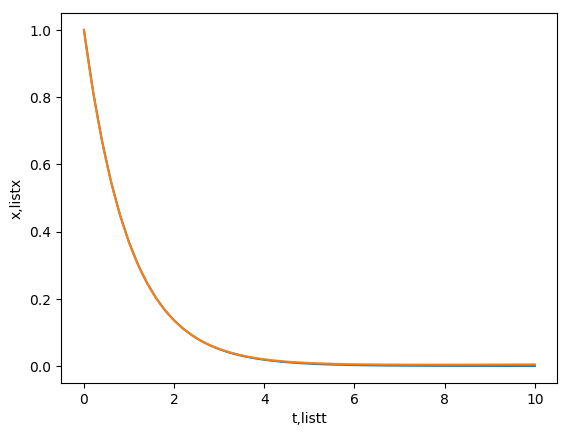

PyObject <matplotlib.text.Text object at 0x000000003DEC0D68>

In [138]:
t = []
x = []
for i in 0:50
    push!(t,10*i/50)
    push!(x,exp.(-t[i+1]))
end
plot(t,x)
listt,listx = regla_punto_medio(f,1,0,10,0.001)
plot(listt,listx)
ylabel("x,listx")
xlabel("t,listt")

### Ejercicio 3. Implementación del Método de Runge-Kutta de orden 4

In [139]:
function Runge_Kutta_orden_4(f,x0,t0,tf,h) #Se crea una función que permite, mediante el método de Runge-Kutta de
    #orden 4, obtener la solución aproximada de una ecuación diferencial. Las entradas de esta 
    #función son las mismas que aquellas de la función para el método implícito de Euler y para la 
    #regla del punto medio.
    listt = [] #Se crea un vector cuyo valor inicial es t0 y valor final tf donde la separación entre  
    #sus valores está dada por el valor de h.
        for i in t0:h:tf
            push!(listt,i) 
        end
    listx = [] #Se crea un vector en donde se guardan los valores xk del método de Runge-Kutta de 
    #orden 4.
    xk = x0
        for i in 1:length(listt) #Se realiza un for donde se da un intervalo a i cuyo tamaño es el
        #de la lista t.
        
            push!(listx,xk) #Se guarda el valor de xk en la lista x.
            #Se definen funciones necesarias para implementar el método de Runge-Kutta de orden 4.
            k1 = f(listt[i], xk)
            k2 = f(listt[i] + h/2, xk + ((h/2)*k1))
            k3 = f(listt[i] + h/2, xk + ((h/2)*k2))
            k4 = f(listt[i] + h, xk + h*k3)
            
            xk = xk + (h/6) * (k1 + 2*k2 + 2*k3 + k4) #Se realiza la operación que determina los 
            #valores xk.
        end
    return listx, listt #Se regresan las listas listx y listt.
end

Runge_Kutta_orden_4 (generic function with 1 method)

In [140]:
using PyPlot

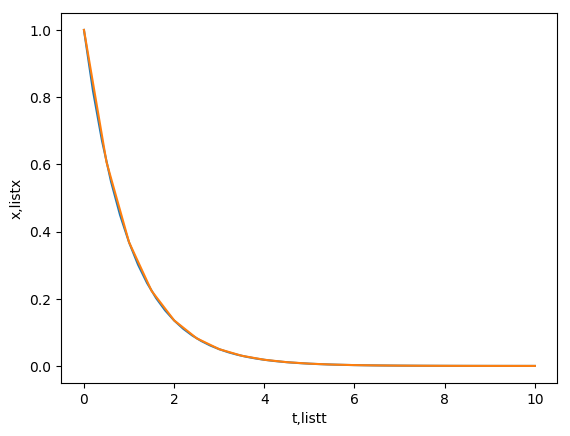

PyObject <matplotlib.text.Text object at 0x000000002BE65CC0>

In [141]:
#Se grafica la solución obtenida mediante Runge-Kutta y la solución exacta.
t = []
x = []
for i in 0:50
    push!(t,10*i/50)
    push!(x,exp.(-t[i+1]))
end
plot(t,x)
listx,listt = Runge_Kutta_orden_4(f,1,0,10,0.5)
plot(listt,listx)
ylabel("x,listx")
xlabel("t,listt")

### Ejercicio 4. Comparación con el ejercicio 1 de la tarea 11

A continuación se escribe el método de Euler implementado en la tarea 11

In [142]:
function metodo_euler(f,x0,t0,tf,h) #Se crea una función que permite, mediante el método de Euler, obtener
    #la solución aproximada de una ecuación diferencial. Dicha función toma como entradas la función que 
    #aparece en tal ecuación, la condición inicial, el valor inicial de t, el valor final de t, y el valor de h.
    listt = [] #Se crea un vector cuyo valor inicial es t0 y valor final tf donde la separación entre  
    #sus valores está dada por el valor de h.
        for i in t0:h:tf
            push!(listt,i) 
        end
    listx = [] #Se crea un vector en donde se guardan los valores xk del método de Euler.
    xk = x0 
        for j in 1:length(listt)
            push!(listx,xk)
            xk = xk + f(xk,listt[j])*h        
        end
    return listt, listx #Se regresan la listas listt y listx.
end

metodo_euler (generic function with 1 method)

In [143]:
metodo_euler(f,1,0,10,0.1)

(Any[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9  …  9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0], Any[1, 1.0, 0.99, 0.97, 0.94, 0.9, 0.85, 0.79, 0.72, 0.64  …  -39.95, -40.86, -41.78, -42.71, -43.65, -44.6, -45.56, -46.53, -47.51, -48.5])

In [144]:
function exponencial(t) #Se crea la función exponencial pues es la solución exacta y será graficada junto con
    #la aproximación del método de Euler para ver gráficamente la comparación entre estas soluciones.
    return exp.(-t)
end

exponencial (generic function with 1 method)

In [145]:
function fu(x,t) #Se crea una función particular para implementar el método de Euler.
    return -x
end

fu (generic function with 1 method)

### A continuación se presentan gráficas para distintos valores de h utilizando el método de Euler y el método implícito de Euler

#### Gráficas usando el método de Euler

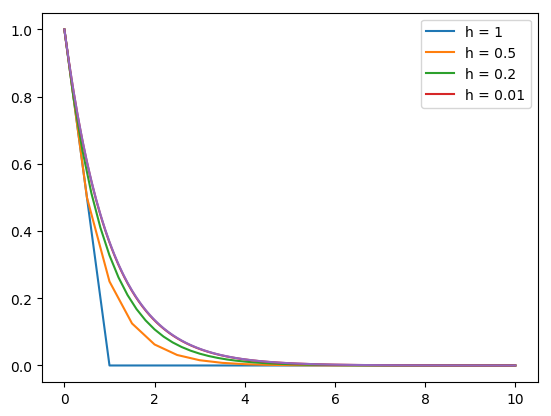

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003FD0FA20>

In [146]:
#Se grafica el método de Euler para h = 1, 0.5, 0.2, 0.01 así como la función exponencial.
listt,listx = metodo_euler(fu,1,0,10,1) #Para h = 1
plot(listt,listx, label = "h = 1")
listt,listx = metodo_euler(fu,1,0,10,0.5) #Para h = 0.5
plot(listt,listx, label = "h = 0.5")
listt,listx = metodo_euler(fu,1,0,10,0.2) #Para h = 0.2
plot(listt,listx, label = "h = 0.2")
listt,listx = metodo_euler(fu,1,0,10,0.01) #Para h = 0.01
plot(listt,listx, label = "h = 0.01")
legend()
t=[] 
for i in 0:0.1:10 
    push!(t,i) 
end
plot(t, [exponencial(i) for i in t]) #Para la exponencial se tiene la gráfica roja.
#Se observa que para valores de h cada vez más pequeños, el método de Euler es una mejor aproximación a la 
#solución exacta.

#### Gráficas usando el método implícito de Euler

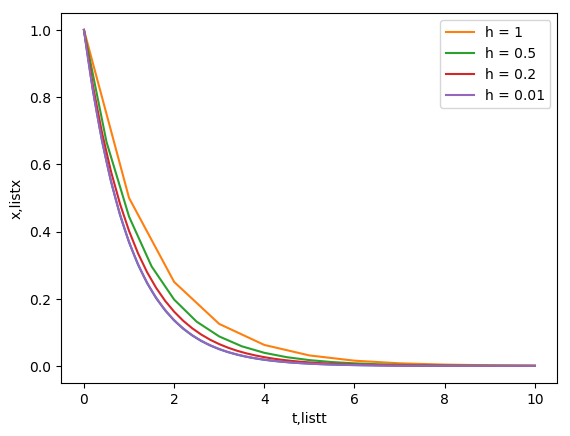

PyObject <matplotlib.legend.Legend object at 0x000000003EFCF128>

In [147]:
t = []
x = []
for i in 0:50
    push!(t,10*i/50)
    push!(x,exp.(-t[i+1]))
end
plot(t,x)
ylabel("x,listx")
xlabel("t,listt")

#Se grafica el método implícito de Euler para h = 1, 0.5, 0.2, 0.01 así como la función exponencial.
listt,listx = metodo_implicito_euler(f,1,0,10,1) #Para h = 1 .
plot(listt,listx, label = "h = 1")
listt,listx = metodo_implicito_euler(f,1,0,10,0.5) #Para h = 0.5 
plot(listt,listx, label = "h = 0.5")
listt,listx = metodo_implicito_euler(f,1,0,10,0.2) #Para h = 0.2 
plot(listt,listx, label = "h = 0.2")
listt,listx = metodo_implicito_euler(f,1,0,10,0.01) #Para h = 0.01 
plot(listt,listx, label = "h = 0.01")
legend()

Se observa una mejor aproximación a la solución exacta utilizando el método implícito, en particular para valores de h grandes, tal como h = 1.

### Ejercicio 5. Resolver una ecuación utilizando los métodos del punto medio y de Runge Kutta.

In [148]:
function G(t,x) #Se crea la función dada en el ejercicio.
return (2x-18t)/(1+t)
end

G (generic function with 1 method)

#### A continuación se grafica la solución de la ecuación anterior usando los métodos de el punto medio y de Runge-Kutta, así como la solución exacta.

Mediante Runge-Kutta se tiene lo siguiente

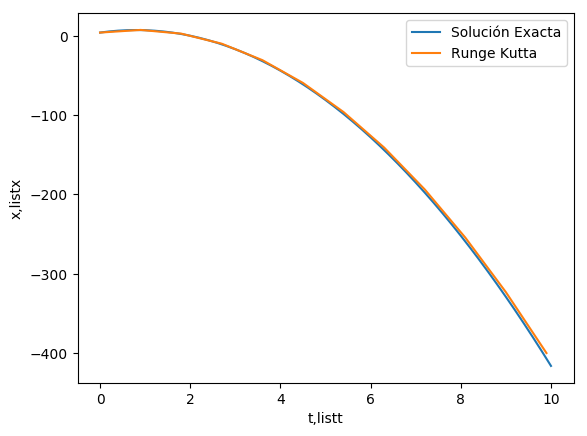

PyObject <matplotlib.text.Text object at 0x000000003EFE9C50>

In [149]:
t3 = []
x3 = []
for i in 0:50
    push!(t3,i/5)
    push!(x3,4 + 8t[i+1] - 5(t[i+1])^2)
end
plot(t3,x3, label = "Solución Exacta")
listx,listt = Runge_Kutta_orden_4(G,4,0,10,0.9)
plot(listt,listx, label = "Runge Kutta")
legend()
ylabel("x,listx")
xlabel("t,listt")

Mediante el método del punto medio se tiene lo siguiente

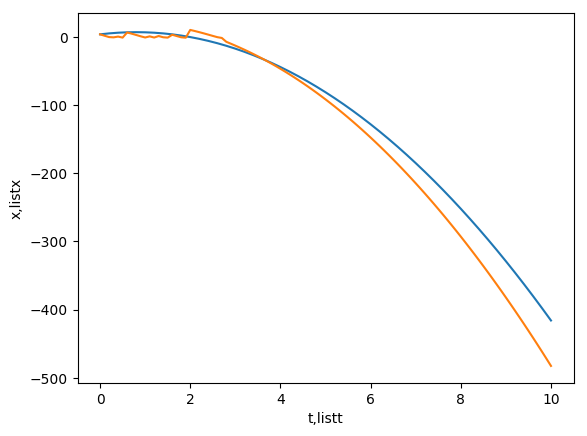

PyObject <matplotlib.text.Text object at 0x000000003F059828>

In [150]:
t2 = [] 
x2 = []
for i in 0:50
    push!(t2,i/5)
    push!(x2,4 + 8t[i+1] - 5(t[i+1])^2)
end
plot(t2,x2, label = "Solución Exacta")
listt,listx = regla_punto_medio(G,4,0,10,0.1)
plot(listt,listx)
ylabel("x,listx")
xlabel("t,listt")

### Ejercicios 6 y 7. Gráfica de la Energía contra el tiempo y posición contra velocidad usando los métodos de Runge-Kutta y de Euler vectoriales

In [151]:
function F(x,u) #Se define una función cuyo valor es aquel que toma como segunda entrada
return u
end

F (generic function with 1 method)

In [152]:
function H(x,u) #Se define una función cuyo valor es aquel que toma como primer entrada con signo negativo.
return -x
end

H (generic function with 1 method)

In [153]:
listT = linspace(0,10,100)

0.0:0.10101010101010101:10.0

In [154]:
function Runge_Kutta_orden_4_vec(f,x0,list) #Se crea una función que permite, mediante el método de Runge-Kutta de
    #orden 4 vectorial, obtener la solución aproximada de una ecuación diferencial. Las entradas de esta 
    #función son la función, el valor inicial x0 y una lista.
   
    listx = [] #Se crea un vector en donde se guardan los valores xk del método de Runge-Kutta de 
    #orden 4.
    xk = x0
    h = list[2]-list[1]
       
        for i in 1:length(list)#Se realiza un for donde se da un intervalo a i cuyo tamaño es el
        #de la lista t.
            t = i*h
            
            #Se definen funciones necesarias para implementar el método de Runge-Kutta de orden 4.
            k1 = f(t,xk)
            k2 = f(t + h/2,xk + ((h/2)*k1))
            k3 = f(t + h/2,xk + ((h/2)*k2))
            k4 = f(t + h, xk + h*k3)
            xk = xk + (h/6) * (k1 + 2*k2 + 2*k3 + k4) #Se realiza la operación que determina los 
            #valores xk.
     push!(listx,xk) #Se guarda el valor de xk en la lista x.
         end
     return listx  #Se regresa la lista listx.
end 

Runge_Kutta_orden_4_vec (generic function with 1 method)

In [155]:
fun(t,x) = [x[2], - x[1]] #Se define la función asociada al sistema de ecuaciones del oscilador armónico.

fun (generic function with 1 method)

In [156]:
listx = map(x->x[1] ,  Runge_Kutta_orden_4_vec(fun,[0,1],listT)) #Se guardan en listx los elementos x[1] de la solución. 
listu = map(x->x[2] ,  Runge_Kutta_orden_4_vec(fun,[0,1],listT)) #Se guardan en listu los elementos u[1] de la solución.


100-element Array{Float64,1}:
  0.994903
  0.979663
  0.954437
  0.91948 
  0.87515 
  0.821899
  0.760268
  0.690888
  0.614464
  0.531776
  0.443667
  0.351035
  0.254824
  ⋮       
 -0.906917
 -0.944778
 -0.973008
 -0.991319
 -0.999524
 -0.997539
 -0.985385
 -0.963186
 -0.931167
 -0.889656
 -0.839076
 -0.779941

La siguiente gráfica muestra la Energía como función del tiempo.

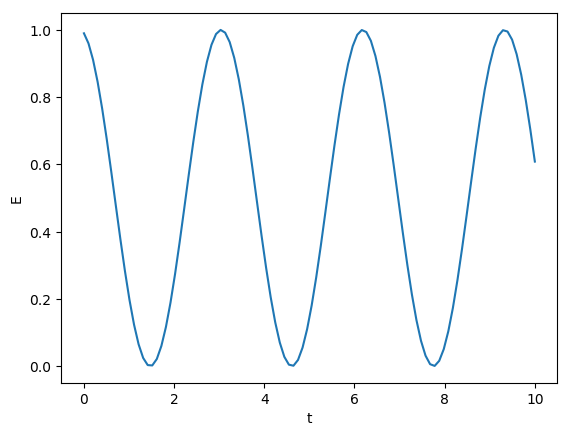

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003F6DB198>

In [157]:
cuadrado(u) = u^2 
x=listx
u=listu
E=(cuadrado.(u)) #Se grafica el valor cuadrado de la velocidad.
xlabel("t");ylabel("E")
plot(listT,E)

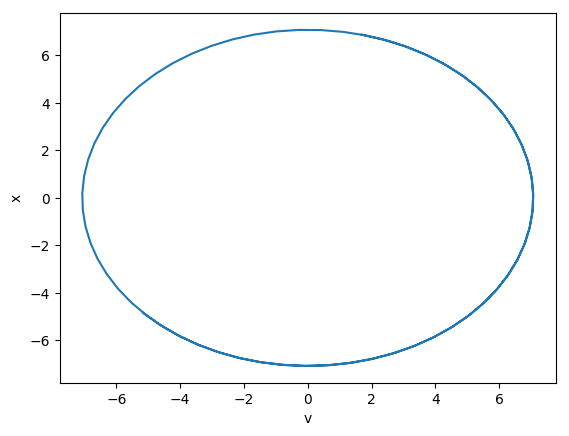

In [158]:
list = 0:0.1:10 #Se define una lista de intervalo 0 a 10 con separación 0.1
vec = Runge_Kutta_orden_4_vec(fun,[1,7],list) # Se define un vector cuyas entradas son la función que se definió antes,
#un punto particular y list.
listx1 = map(x->x[1],vec) #Guarda  los elementos x[1] de cada elemeno de vec en listx1.
listx2 = map(x->x[2],vec) #Guarda  los elementos x[2] de cada elemeno de vec en listx2.
xlabel("v");ylabel("x") #Se grafica velocidad contra posición.
plot(listx1,listx2);

In [169]:
function metodo_euler_vec(F,H,x0,u0,lista) #Se crea una función que permite, mediante el método de Euler
    #vectorial obtener la solución aproximada de una ecuación diferencial. Las entradas de esta 
    #función son las funciones F, H, los valores iniciales x0, u0 y una lista.
  
    h = (lista[end] - lista[1])/(length(lista) - 1) #Se escribe el paso de h.
    
    listx = [] #Se crea un vector en donde se guardan los valores x del método de Euler.
    listu = [] #Se crea un vector en donde se guardan los valores u del método de Euler.
    
    t = lista[1] #Se asigna a t el primer valor de la lista.
    x = x0 #Se asigna los valores iniciales a x y u.
    u = u0
        for i in 1:length(lista) #Se realiza un for donde se da un intervalo a i cuyo tamaño es el
        #de la lista.
            push!(listx,x) #Se guarda el valor de x en listx.
            x = x + (h*F(x,u)) #Se realiza la operación que determina los 
            #valores u.
            push!(listu,u) #Se guarda el valor de u en listu.
            u = u + (h * H(x,u)) #Se realiza la operación que determina los 
            #valores u.
        
            t = lista[i]
        end
return (listx,listu)  #Se regresan las listas listx y listu.
end

metodo_euler_vec (generic function with 1 method)

In [170]:
(listx,listu) = metodo_euler_vec(F,H,0,1,listT) #Se definen los valores de listx y listu mediante el método de Euler vectorial.

(Any[0, 0.10101, 0.20099, 0.298918, 0.393797, 0.484658, 0.570574, 0.650669, 0.724124, 0.790192  …  0.324457, 0.227242, 0.127708, 0.0268714, -0.0742394, -0.174593, -0.273165, -0.36895, -0.46097, -0.548287], Any[1, 0.989797, 0.969495, 0.939301, 0.899524, 0.850568, 0.792935, 0.72721, 0.654067, 0.574249  …  -0.962429, -0.985383, -0.998283, -1.001, -0.993498, -0.975862, -0.94827, -0.911002, -0.86444, -0.809057])

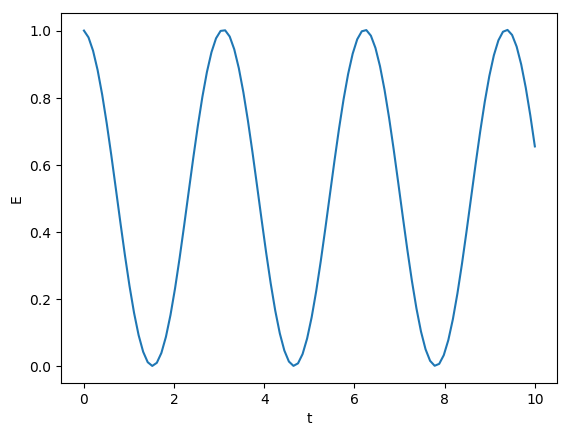

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000041DBD198>

In [171]:
cuadrado(u)=u^2 
x=listx
u=listu
E=(cuadrado.(u)) #Se grafica el valor cuadrado de la velocidad.
xlabel("t");ylabel("E")
plot(listT,E)

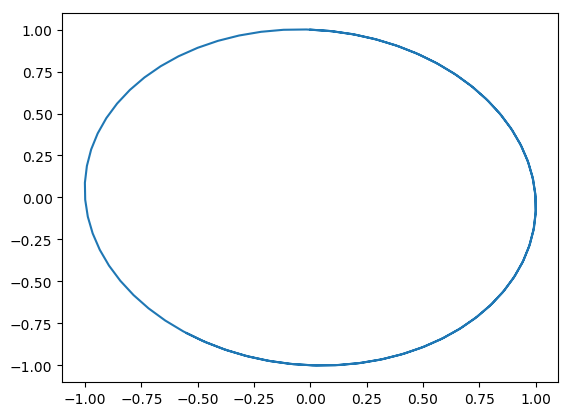

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000042078978>

In [172]:
plot(listx,listu) #Se grafica velocidad contra posición.

### Ejercicio 8.  Gráfica del oscilador armónico en el espacio fase usando varias condiciones iniciales usando Runge-Kutta.

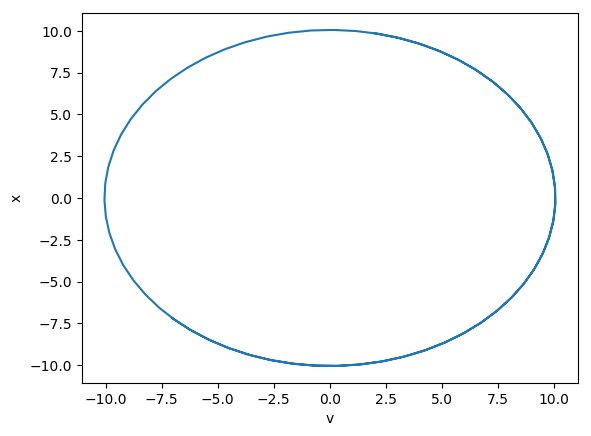

In [173]:
list = 0:0.1:10 #Se define una lista de intervalo 0 a 10 con separación 0.1
vec = Runge_Kutta_orden_4_vec(fun,[1,10],list) # Se define un vector cuyas entradas son la función que se definió antes,
#un punto particular y list.
listx1 = map(x->x[1],vec) #Guarda  los elementos x[1] de cada elemeno de vec en listx1.
listx2 = map(x->x[2],vec) #Guarda  los elementos x[2] de cada elemeno de vec en listx2.
xlabel("v");ylabel("x") #Se grafica velocidad contra posición.
plot(listx1,listx2);

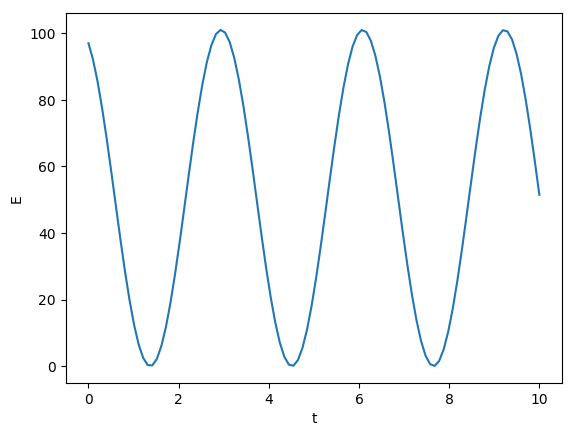

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000425EC358>

In [174]:
listx = map(x->x[1] ,  Runge_Kutta_orden_4_vec(fun,[1,10],listT)) #Se guardan en listx los elementos x[1] de la solución. 
listu = map(x->x[2] ,  Runge_Kutta_orden_4_vec(fun,[1,10],listT)) #Se guardan en listu los elementos u[1] de la solución.

cuadrado(u) = u^2 
x=listx
u=listu
E=(cuadrado.(u)) #Se grafica el valor cuadrado de la velocidad.
xlabel("t");ylabel("E")
plot(listT,E)

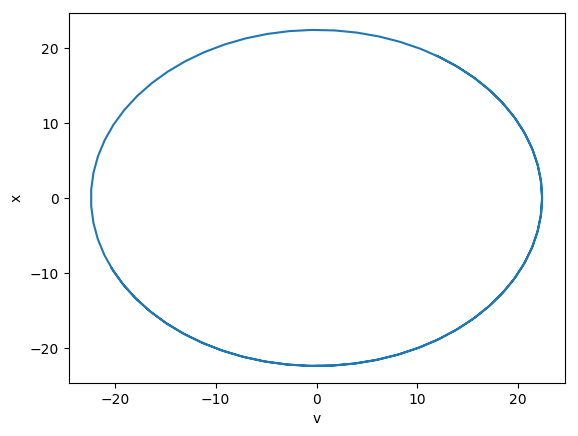

In [175]:
list = 0:0.1:10 #Se define una lista de intervalo 0 a 10 con separación 0.1
vec = Runge_Kutta_orden_4_vec(fun,[10,20],list) # Se define un vector cuyas entradas son la función que se definió antes,
#un punto particular y list.
listx1 = map(x->x[1],vec) #Guarda  los elementos x[1] de cada elemeno de vec en listx1.
listx2 = map(x->x[2],vec) #Guarda  los elementos x[2] de cada elemeno de vec en listx2.
xlabel("v");ylabel("x") #Se grafica velocidad contra posición.
plot(listx1,listx2);

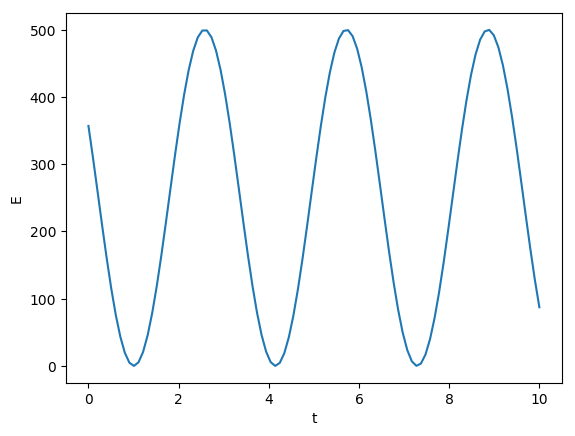

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000042BCA7F0>

In [176]:
listx = map(x->x[1] ,  Runge_Kutta_orden_4_vec(fun,[10,20],listT)) #Se guardan en listx los elementos x[1] de la solución. 
listu = map(x->x[2] ,  Runge_Kutta_orden_4_vec(fun,[10,20],listT)) #Se guardan en listu los elementos u[1] de la solución.

cuadrado(u) = u^2 
x=listx
u=listu
E=(cuadrado.(u)) #Se grafica el valor cuadrado de la velocidad.
xlabel("t");ylabel("E")
plot(listT,E)

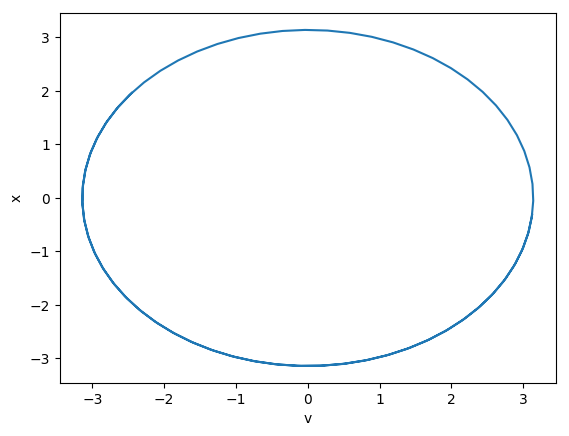

In [177]:
list = 0:0.1:10 #Se define una lista de intervalo 0 a 10 con separación 0.1
vec = Runge_Kutta_orden_4_vec(fun,[pi,0],list) # Se define un vector cuyas entradas son la función que se definió antes,
#un punto particular y list.
listx1 = map(x->x[1],vec) #Guarda  los elementos x[1] de cada elemeno de vec en listx1.
listx2 = map(x->x[2],vec) #Guarda  los elementos x[2] de cada elemeno de vec en listx2.
xlabel("v");ylabel("x") #Se grafica velocidad contra posición.
plot(listx1,listx2);

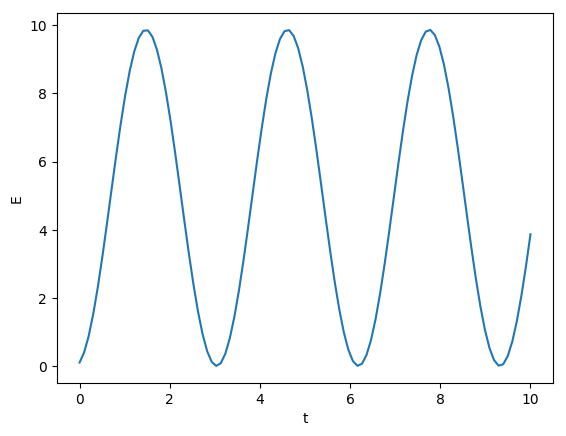

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000430DA390>

In [178]:
listx = map(x->x[1] ,  Runge_Kutta_orden_4_vec(fun,[pi,0],listT)) #Se guardan en listx los elementos x[1] de la solución. 
listu = map(x->x[2] ,  Runge_Kutta_orden_4_vec(fun,[pi,0],listT)) #Se guardan en listu los elementos u[1] de la solución.

cuadrado(u) = u^2 
x=listx
u=listu
E=(cuadrado.(u)) #Se grafica el valor cuadrado de la velocidad.
xlabel("t");ylabel("E")
plot(listT,E)